# pip & import

In [1]:
!pip install catboost

In [2]:
!pip install micropip

In [3]:
!pip install matplotlib-venn

In [4]:
#hiddencell
import micropip
await micropip.install("seaborn")

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

In [5]:
import os
import random
import numpy as np
import pandas as pd

In [6]:
!rm -rf ~/.cache/matplotlib
!sudo apt-get install fonts-nanum
!sudo fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [8]:
plt.rc('font', family='NanumBarunGothic')
# 한글 폰트 사용 시 마이너스 폰트 깨짐 방지
plt.rc('axes', unicode_minus=False)

# **고객 대출등급 분류**

## seed 고정 & 함수 정의


In [9]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

## 데이터 불러오기



In [10]:
train_org = pd.read_csv('train.csv')
test_org = pd.read_csv('test.csv')
sample_submission = pd.read_csv("sample_submission.csv")

In [11]:
train_df = train_org.copy()
test_df = test_org.copy()

In [12]:
test_df.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

In [13]:
train_df.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [15]:
train_df.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [16]:
for c in train_df.columns:
  print(train_df[c].value_counts())

TRAIN_00000    1
TRAIN_64192    1
TRAIN_64201    1
TRAIN_64200    1
TRAIN_64199    1
              ..
TRAIN_32096    1
TRAIN_32095    1
TRAIN_32094    1
TRAIN_32093    1
TRAIN_96293    1
Name: ID, Length: 96294, dtype: int64
12000000    6662
14400000    5826
24000000    5744
18000000    5582
42000000    4473
            ... 
33630000       1
37560000       1
41520000       1
41730000       1
39450000       1
Name: 대출금액, Length: 1340, dtype: int64
 36 months    64479
 60 months    31815
Name: 대출기간, dtype: int64
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: 근로기간, dtype: int64
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: 주택소유상태, dtype: int64
72000000    3813
60000000    3299
78000000    2897
84000

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in train_df.columns:
  train_df[f'{col}_숫자'] = label_encoder.fit_transform(train_df[col])

In [18]:
train_df_number = train_df.select_dtypes(include=np.number)
train_df_number = train_df_number.drop(columns=['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자',
       '총연체금액', '연체계좌수','ID_숫자'])
train_df_tmp = train_df_number
train_df_tmp.columns

Index(['대출금액_숫자', '대출기간_숫자', '근로기간_숫자', '주택소유상태_숫자', '연간소득_숫자',
       '부채_대비_소득_비율_숫자', '총계좌수_숫자', '대출목적_숫자', '최근_2년간_연체_횟수_숫자', '총상환원금_숫자',
       '총상환이자_숫자', '총연체금액_숫자', '연체계좌수_숫자', '대출등급_숫자'],
      dtype='object')

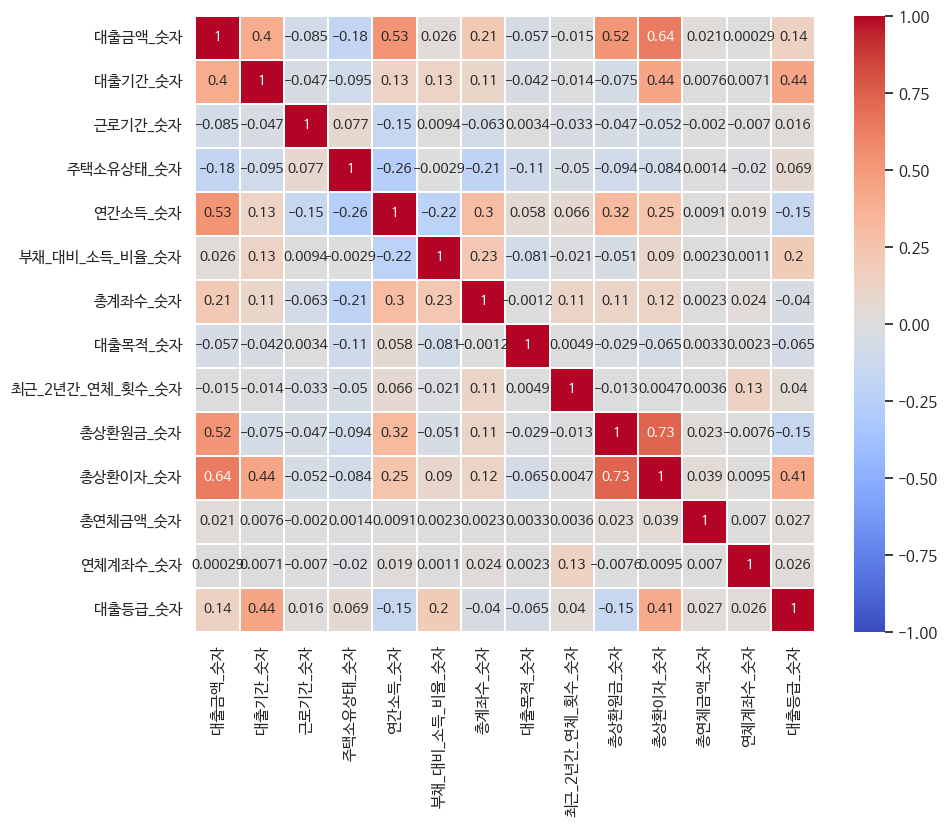

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 나눔 바른고딕 폰트 설정
sns.set(font="NanumBarunGothic")

# 그래프의 기본 폰트 설정
plt.rcParams["font.family"] = 'NanumBarunGothic'

# 히트맵 생성 코드
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(train_df_tmp.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='coolwarm')

# 각 셀의 텍스트에 대한 폰트 설정
for text in heatmap.texts:
    text.set_fontsize(10)  # 폰트 크기를 원하는 크기로 조절하세요

# 플롯 보여주기
plt.show()

In [20]:
#hiddencell
import micropip
await micropip.install("seaborn")

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rcParams['font.family'] = 'NanumBarunGothic'

<Axes: xlabel='대출금액_숫자', ylabel='총상환이자_숫자'>

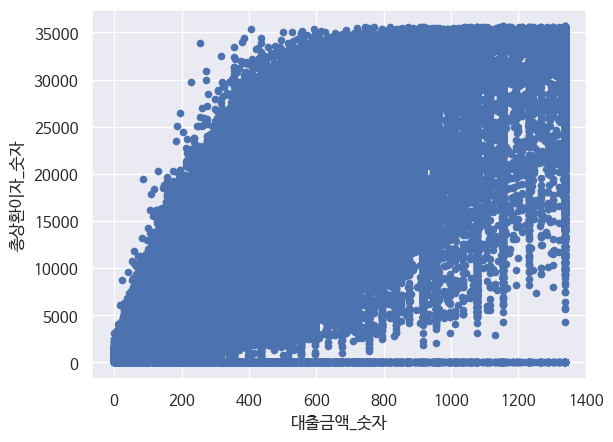

In [21]:
train_df_tmp.plot(kind='scatter', x='대출금액_숫자', y='총상환이자_숫자')

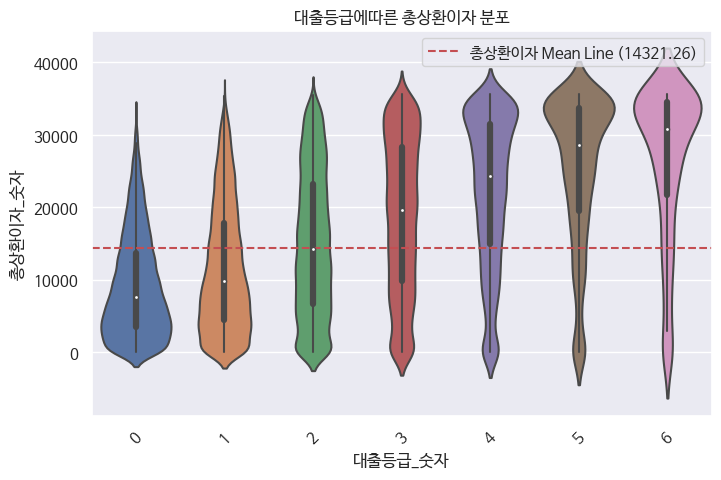

In [22]:
plt.figure(figsize=(8,5))
sns.violinplot(x='대출등급_숫자', y='총상환이자_숫자', data=train_df_tmp)
avg = train_df_tmp['총상환이자_숫자'].mean()
plt.axhline(avg, ls='--', color='r', label=f'총상환이자 Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("대출등급에따른 총상환이자 분포")
plt.show()

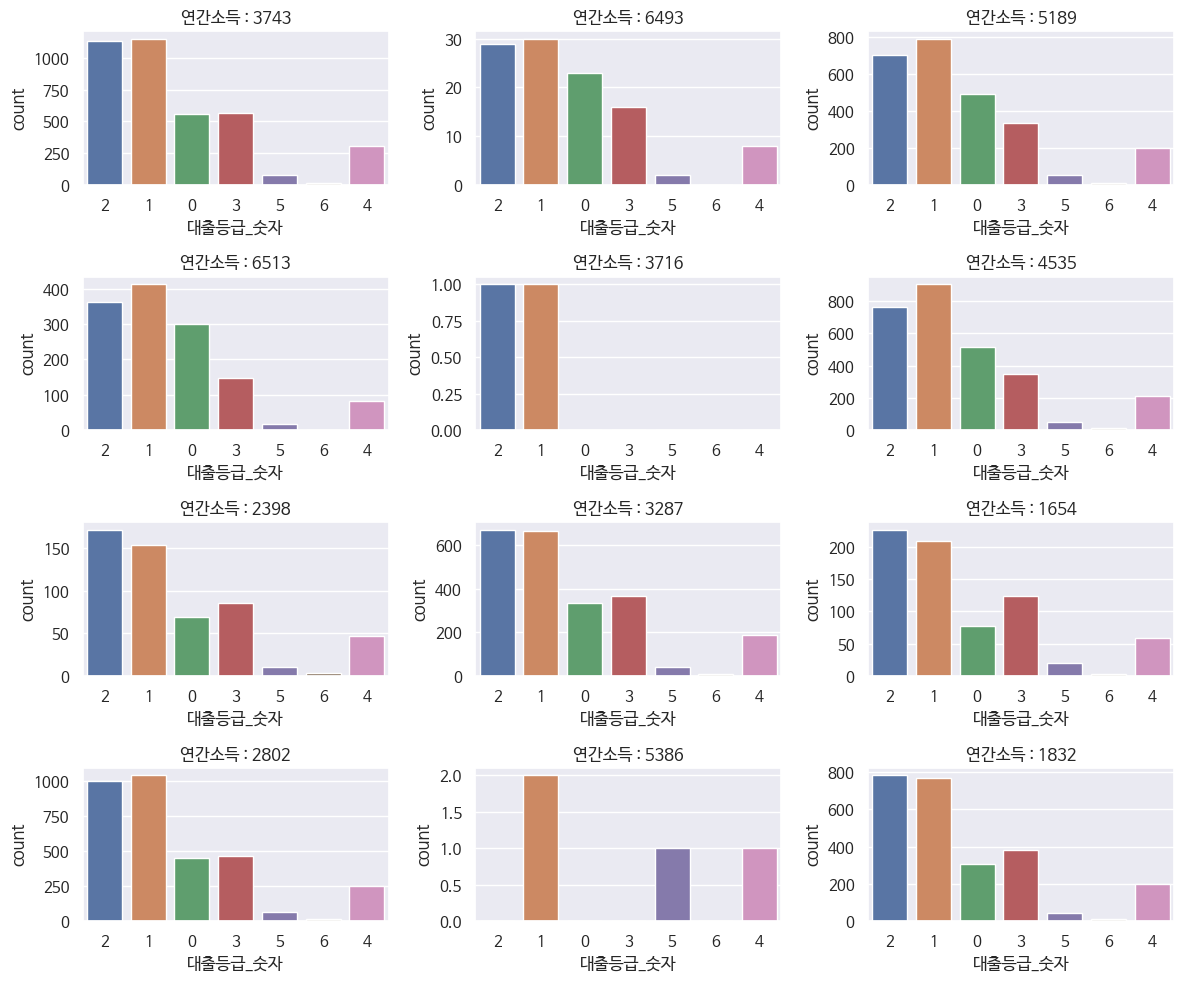

In [23]:
fig, axes = plt.subplots(4,3, figsize=(12,10))

# x축 label 순서 맞추기
x_order = train_df_tmp['대출등급_숫자'].unique()

for (ax, k) in zip(axes.flatten(), train_df_tmp['연간소득_숫자'].unique()):
    sns.countplot(x='대출등급_숫자', data=train_df_tmp[train_df_tmp['연간소득_숫자'] == k], ax=ax, order=x_order)
    ax.set_title(f"연간소득 : {k}")

plt.tight_layout()
plt.show()

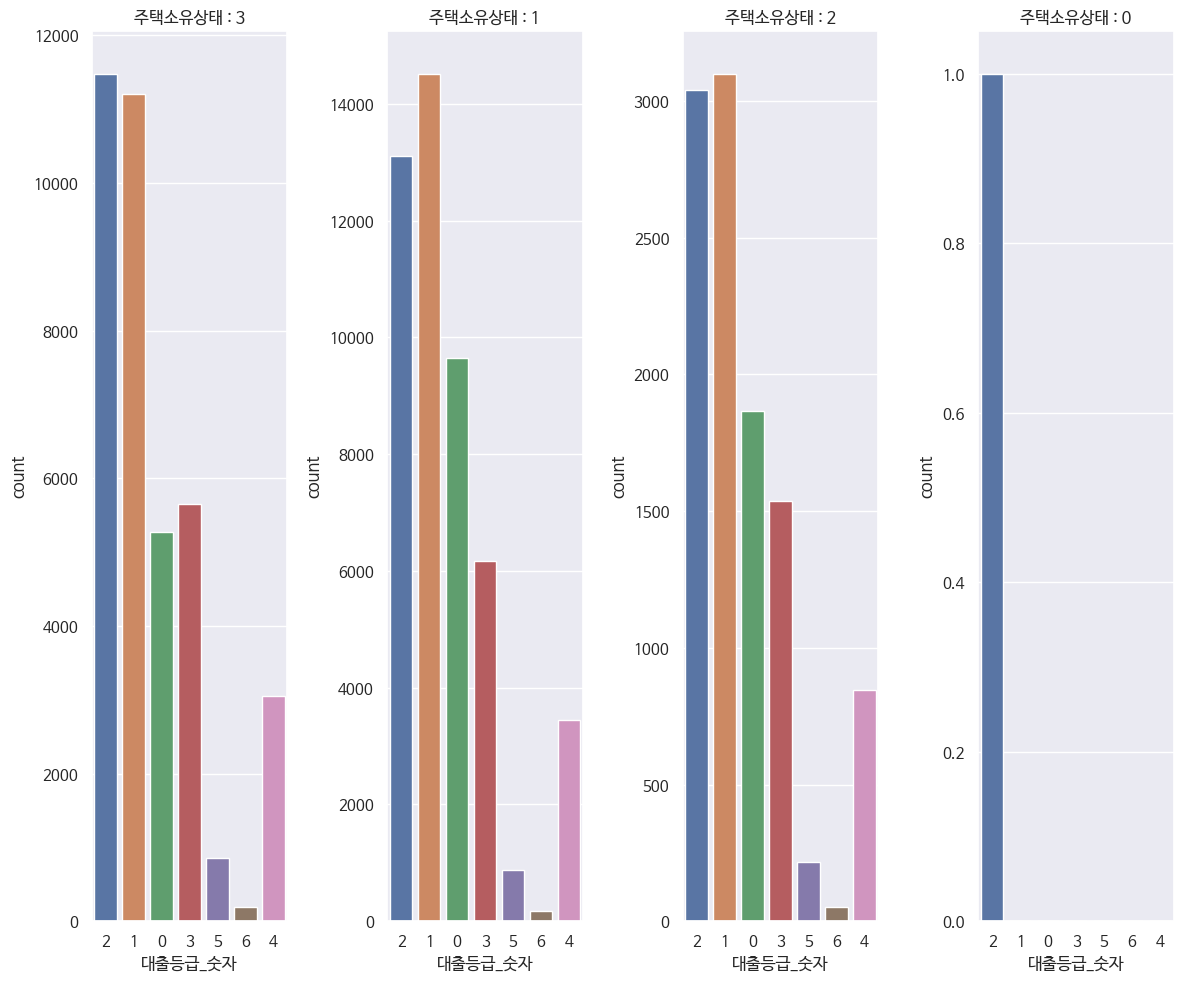

In [24]:
fig, axes = plt.subplots(1,4, figsize=(12,10))

# x축 label 순서 맞추기
x_order = train_df_tmp['대출등급_숫자'].unique()

for (ax, k) in zip(axes.flatten(), train_df_tmp['주택소유상태_숫자'].unique()):
    sns.countplot(x='대출등급_숫자', data=train_df_tmp[train_df_tmp['주택소유상태_숫자'] == k], ax=ax, order=x_order)
    ax.set_title(f"주택소유상태 : {k}")

plt.tight_layout()
plt.show()

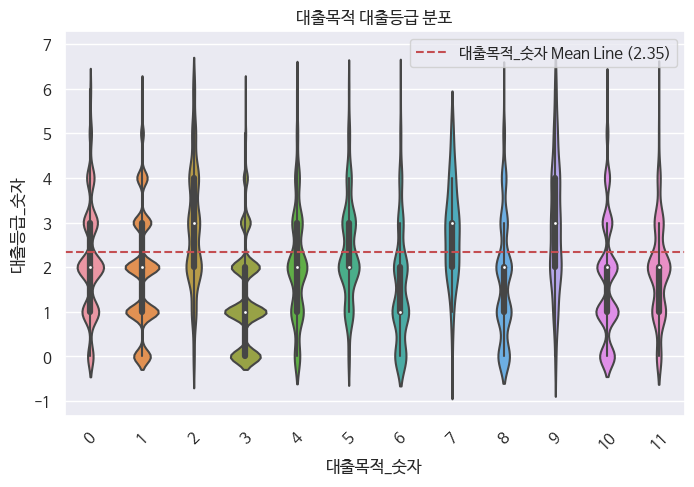

In [25]:
plt.figure(figsize=(8,5))
sns.violinplot(x='대출목적_숫자', y='대출등급_숫자', data=train_df_tmp)
avg = train_df_tmp['대출목적_숫자'].mean()
plt.axhline(avg, ls='--', color='r', label=f'대출목적_숫자 Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("대출목적 대출등급 분포")
plt.show()

In [26]:
train_df_object = train_df.select_dtypes(include='object')
train_df_object.columns

Index(['ID', '대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급'], dtype='object')

In [27]:
train_df_object.describe()

,ID,대출기간,근로기간,주택소유상태,대출목적,대출등급
count,96294,96294,96294,96294,96294,96294
unique,96294,2,16,4,12,7
top,TRAIN_00000,36 months,10+ years,MORTGAGE,부채 통합,B
freq,1,64479,31585,47934,55150,28817
